<a href="https://colab.research.google.com/github/OlegDenisenko/Data-analyst-Step1k/blob/main/5.%20A%D0%BDa%D0%BBu%D1%82u%D0%BA_%D0%B4a%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE%D0%BF_St%D0%B5%D1%80uk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Следующий минипроект :)**

In [2]:
import pandas as pd
transaction = pd.read_csv('https://stepik.org/media/attachments/lesson/361624/transaction_data.csv')#

1) Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график

In [3]:
transaction.head(2)

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull


In [4]:
transaction.shape

(5315, 3)

In [10]:
transaction.dtypes

date           object
name           object
transaction    object
dtype: object

In [8]:
transaction.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [7]:
na_number = transaction.isna().sum()
na_number

date           0
name           0
transaction    0
dtype: int64

In [11]:
transaction.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [12]:
import seaborn as sns

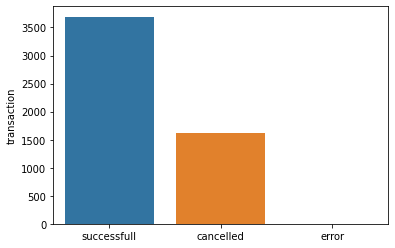

In [15]:
for_barplot = transaction.transaction.value_counts()
sns.barplot(x= for_barplot.index, y= for_barplot);

2) Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.


In [16]:
transactions_per_user = transaction\
                                    .query('transaction == "successfull"')\
                                    .groupby('name')\
                                    .agg({'transaction': 'count'})

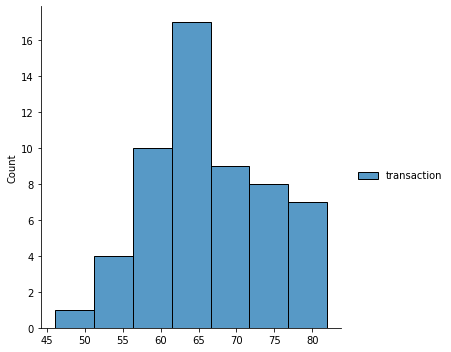

In [19]:
sns.displot(transactions_per_user);

3)Коллега прислал Вам обновленные данные. (transaction_data_updated.csv)
Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.

In [20]:
new_transactions = pd.read_csv('https://stepik.org/media/attachments/lesson/361624/transaction_data_updated.csv')
new_transactions

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [23]:
transaction_number = new_transactions.groupby(['name', 'minute'], as_index= False)\
                                      .agg({'transaction': 'count'})\
                                      .rename(columns={'transaction' : 'transaction_number'})

In [27]:
user_vs_minute_pivot = new_transactions.pivot_table(index = 'minute', 
                                                    columns = 'name',
                                                    values='transaction', 
                                                    aggfunc='count')

In [28]:
user_vs_minute_pivot.fillna(0, inplace=True)

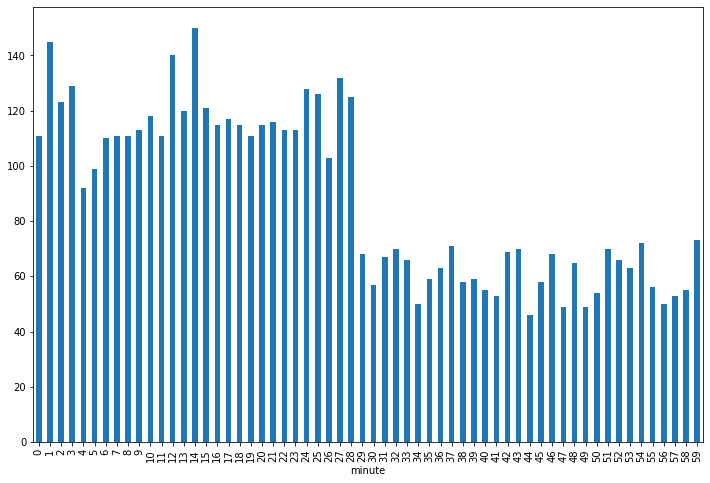

In [30]:
user_vs_minute_pivot.sum(axis=1).plot.bar(figsize =(12,8))

Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

In [31]:
new_transactions.dtypes

date           object
name           object
transaction    object
minute          int64
dtype: object

In [32]:
new_transactions['date'] = pd.to_datetime(new_transactions.date)

In [33]:
new_transactions['true_minute'] = new_transactions.date.dt.minute + new_transactions.date.dt.hour *60

In [34]:
new_transactions['true_minute']

0       37
1       59
2       66
3        2
4       17
        ..
5310     9
5311    46
5312    16
5313    13
5314    75
Name: true_minute, Length: 5315, dtype: int64

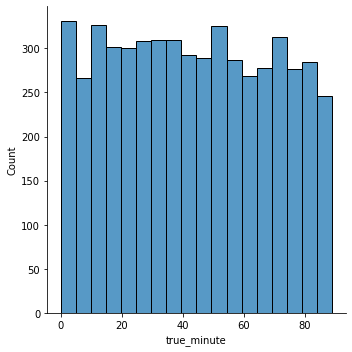

In [36]:
sns.displot(new_transactions['true_minute'])

In [38]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


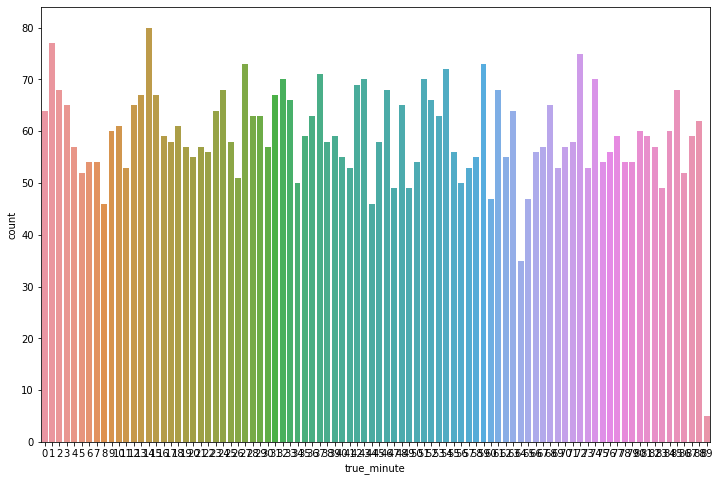

In [40]:
plt.figure(figsize = (12,8))
sns.countplot(new_transactions['true_minute'])

**А вот и наш первый минипроект :)**

In [ ]:
import pandas as pd
import numpy as np
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/362441/taxi_peru.csv', sep=';')#

1) Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Ваша задача положить в переменную  taxi_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'taxi has y rows and x columns'
где y – число строк, а x – число колонок.

In [ ]:
taxi.head(2)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN


In [ ]:
taxi.shape

(23111, 19)

In [ ]:
taxi_shape = f'taxi has {taxi.shape[0]} rows and {taxi.shape[1]} columns'

In [ ]:
print(taxi_shape )

taxi has 23111 rows and 19 columns


2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения.

In [ ]:
na_number = taxi.isna().sum()
na_number

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
source                123
driver_score        15461
rider_score          7721
dtype: int64

**А вот и наш первый минипроект :)**

In [ ]:
import pandas as pd
import numpy as np
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/362441/taxi_peru.csv', sep=';')#

1) Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Ваша задача положить в переменную  taxi_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'taxi has y rows and x columns'
где y – число строк, а x – число колонок.

In [ ]:
taxi.head(2)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN


In [ ]:
taxi.shape

(23111, 19)

In [ ]:
taxi_shape = f'taxi has {taxi.shape[0]} rows and {taxi.shape[1]} columns'

In [ ]:
print(taxi_shape )

taxi has 23111 rows and 19 columns


2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения.

In [ ]:
na_number = taxi.isna().sum()
na_number

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
source                123
driver_score        15461
rider_score          7721
dtype: int64

**А вот и наш первый минипроект :)**

In [ ]:
import pandas as pd
import numpy as np
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/362441/taxi_peru.csv', sep=';')#

1) Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Ваша задача положить в переменную  taxi_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'taxi has y rows and x columns'
где y – число строк, а x – число колонок.

In [ ]:
taxi.head(2)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN


In [ ]:
taxi.shape

(23111, 19)

In [ ]:
taxi_shape = f'taxi has {taxi.shape[0]} rows and {taxi.shape[1]} columns'

In [ ]:
print(taxi_shape )

taxi has 23111 rows and 19 columns


2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения.

In [ ]:
na_number = taxi.isna().sum()
na_number

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
source                123
driver_score        15461
rider_score          7721
dtype: int64

**А вот и наш первый минипроект :)**

In [ ]:
import pandas as pd
import numpy as np
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/362441/taxi_peru.csv', sep=';')#

1) Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Ваша задача положить в переменную  taxi_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'taxi has y rows and x columns'
где y – число строк, а x – число колонок.

In [ ]:
taxi.head(2)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN


In [ ]:
taxi.shape

(23111, 19)

In [ ]:
taxi_shape = f'taxi has {taxi.shape[0]} rows and {taxi.shape[1]} columns'

In [ ]:
print(taxi_shape )

taxi has 23111 rows and 19 columns


2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения.

In [ ]:
na_number = taxi.isna().sum()
na_number

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
source                123
driver_score        15461
rider_score          7721
dtype: int64

**А вот и наш первый минипроект :)**

In [ ]:
import pandas as pd
import numpy as np
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/362441/taxi_peru.csv', sep=';')#

1) Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Ваша задача положить в переменную  taxi_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'taxi has y rows and x columns'
где y – число строк, а x – число колонок.

In [ ]:
taxi.head(2)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN


In [ ]:
taxi.shape

(23111, 19)

In [ ]:
taxi_shape = f'taxi has {taxi.shape[0]} rows and {taxi.shape[1]} columns'

In [ ]:
print(taxi_shape )

taxi has 23111 rows and 19 columns


2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения.

In [ ]:
na_number = taxi.isna().sum()
na_number

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
source                123
driver_score        15461
rider_score          7721
dtype: int64

**А вот и наш первый минипроект :)**

In [ ]:
import pandas as pd
import numpy as np
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/362441/taxi_peru.csv', sep=';')#

1) Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Ваша задача положить в переменную  taxi_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'taxi has y rows and x columns'
где y – число строк, а x – число колонок.

In [ ]:
taxi.head(2)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN


In [ ]:
taxi.shape

(23111, 19)

In [ ]:
taxi_shape = f'taxi has {taxi.shape[0]} rows and {taxi.shape[1]} columns'

In [ ]:
print(taxi_shape )

taxi has 23111 rows and 19 columns


2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения.

In [ ]:
na_number = taxi.isna().sum()
na_number

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
source                123
driver_score        15461
rider_score          7721
dtype: int64

**А вот и наш первый минипроект :)**

In [ ]:
import pandas as pd
import numpy as np
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/362441/taxi_peru.csv', sep=';')#

1) Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Ваша задача положить в переменную  taxi_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'taxi has y rows and x columns'
где y – число строк, а x – число колонок.

In [ ]:
taxi.head(2)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN


In [ ]:
taxi.shape

(23111, 19)

In [ ]:
taxi_shape = f'taxi has {taxi.shape[0]} rows and {taxi.shape[1]} columns'

In [ ]:
print(taxi_shape )

taxi has 23111 rows and 19 columns


2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения.

In [ ]:
na_number = taxi.isna().sum()
na_number

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
source                123
driver_score        15461
rider_score          7721
dtype: int64